<a href="https://colab.research.google.com/github/jhiagho/Hiagho-Junio/blob/master/Q2_1N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1) Transforma a imagem para o dominio da frequencia.


In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

Text(0.5, 1.0, 'Imagem Original em escala de cinza')

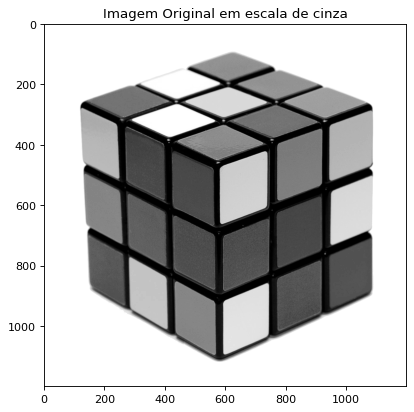

In [75]:
#transforma a imagem em escala de cinza
image_cinza = cv2.imread('/content/cuboo.jpg',0)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(image_cinza, cmap='gray')
plt.title("Imagem Original em escala de cinza")

Text(0.5, 1.0, 'Transformada de Fourier f(u,v)')

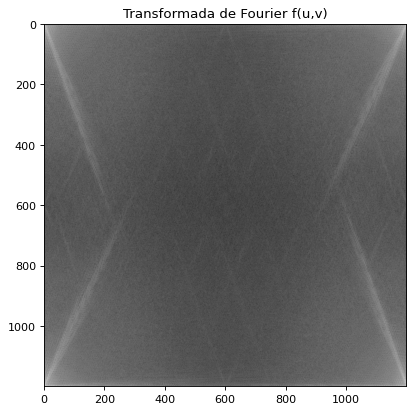

In [76]:
#usando a função fft2, para calcular a transformada em duas dimensões
cinza_f2 = np.fft.fft2(image_cinza)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log1p(abs(cinza_f2)), cmap='gray');
plt.title("f(u,v). Transformada de Fourier")

Text(0.5, 1.0, 'Transformada de Fourier fshift(u,v)')

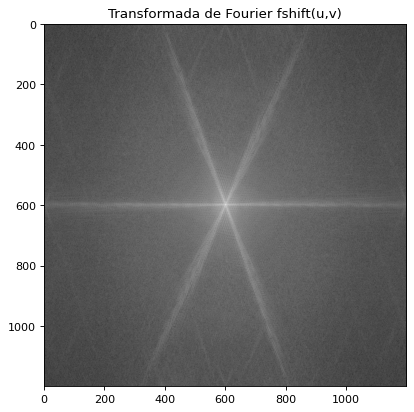

In [77]:
#Aplica-se o deslocamento de frequencia zero para o centro da matriz, Assim e 
#feito uma troca, o primeiro quadrante com o terceiro é o segundo com o quarto

cinza_fsh = np.fft.fftshift(cinza_f2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log1p(abs(cinza_fsh)), cmap='gray');
plt.title("Fshift(u,v)Transformada de Fourier")

## Q2) Multiplique pelo filtro Gaussiano H(u, v) passa baixa e passa alta

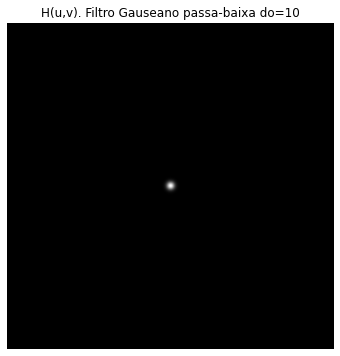

In [106]:
# Cria o filtro gauseano PASSA-BAIXA para aplicar na imagem
# aplicar o cálculo de H(u,v) e D(u,v)
n,m = cinza_fsh.shape

# cria uma matriz H, apenas com valores zeros ou uma imagem preta.
Hb = np.zeros((n,m), dtype=np.float32)

#defina o que d0, indica a itencidade do filtro, quanto maior maior sera o 
#o circulo branco no centro da tela
dO = 10

for u in range(n):
  for v in range(m):
    D = np.sqrt((u-m/2)**2 + (v-n/2)**2)
    Hb[u,v] = np.exp(-D**2/(2*dO*dO))

plt.figure(figsize=(8,6))
plt.imshow(Hb, cmap='gray')
plt.title("H(u,v). Filtro Gauseano passa-baixa do=10")
plt.axis('off')
plt.show()


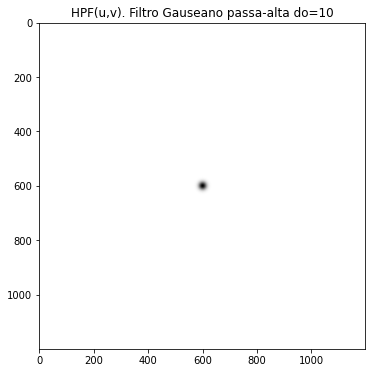

In [103]:
# Cria o filtro gauseano PASSA-ALTA para aplicar na imagem
# aplicar o cálculo de H(u,v) e D(u,v)
n,m = cinza_fsh.shape

# cria uma matriz H, apenas com valores zeros ou uma imagem preta.
Ha = np.zeros((n,m), dtype=np.float32)

#defina o que d0, indica a itencidade do filtro, quanto maior maior sera o 
#o circulo branco no centro da tela
dO = 10

for u in range(n):
  for v in range(m):
    D = np.sqrt((u-m/2)**2 + (v-n/2)**2)
    Ha[u,v] = 1 - np.exp(-D**2/(2*dO*dO))

plt.figure(figsize=(8,6))
plt.imshow(Ha, cmap='gray')
plt.title("HPF(u,v). Filtro Gauseano passa-alta do=10")
plt.show()

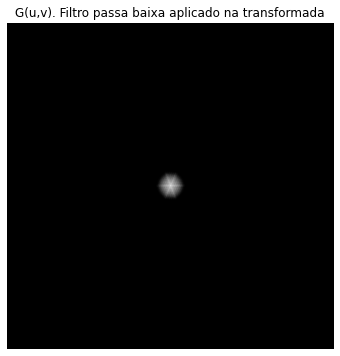

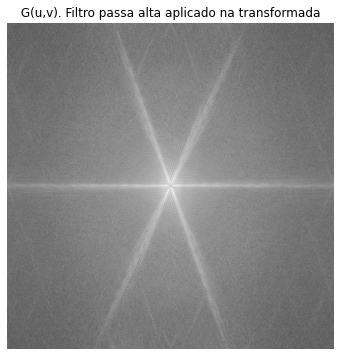

In [104]:
#aplica o filtro passa baixa e passa alta na imagem

#aplica o filtro passa baixa na imagem usando d0 = 10
Gb = cinza_fsh * Hb

plt.figure(figsize=(8,6))
plt.imshow(np.log1p(np.abs(Gb)), cmap='gray')
plt.title("G(u,v). Filtro passa baixa aplicado na transformada")
plt.axis('off')
plt.show()

#aplica o filtro passa alta na imagem usando d0 = 10
Ga = cinza_fsh * Ha

plt.figure(figsize=(8,6))
plt.imshow(np.log1p(np.abs(Ga)), cmap='gray')
plt.title(" G(u,v). Filtro passa alta aplicado na transformada ")
plt.axis('off')
plt.show()


# Q3) Faça a transformada de Fourier inversa passa baixa e passa alta


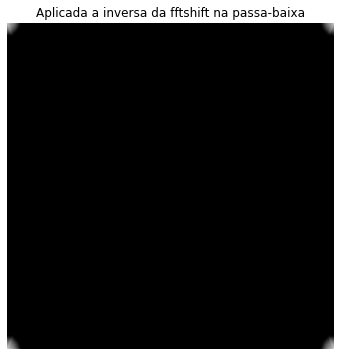

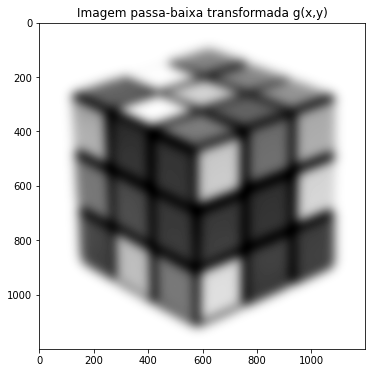

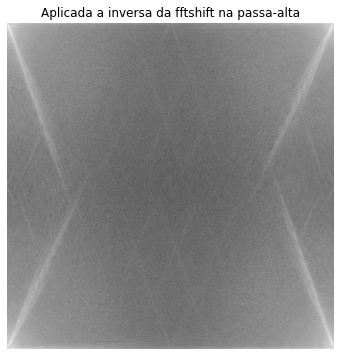

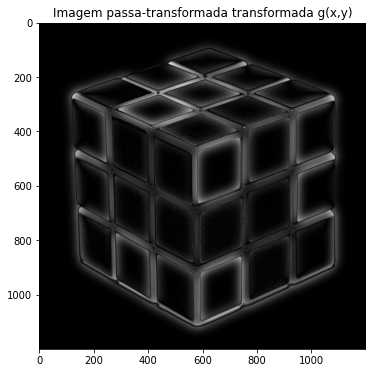

In [105]:
#aplica a transformada de fourier inversa nas imagem
#APLICA O FILTRO PASSA-BAIXA
#primeira calcula inversa do shift para descentralizar a imagem.
Gbinversa = np.fft.ifftshift(Gb)

plt.figure(figsize=(8,6))
plt.imshow(np.log1p(np.abs(Gbinversa)), cmap='gray')
plt.title("Aplicada a inversa da fftshift na passa-baixa")
plt.axis('off')
plt.show()

#Calcula a inversa depois de descentralizar a imagem.
Gbtransf = np.abs(np.fft.ifft2(Gbinversa))

plt.figure(figsize=(8,6))
plt.imshow(Gbtransf, cmap='gray')
plt.title("Imagem passa-baixa transformada g(x,y)")
plt.show()

#APLICA O FILTRO PASSA-ALTA usando d0 = 10
GaInversa = np.fft.ifftshift(Ga)

plt.figure(figsize=(8,6))
plt.imshow(np.log1p(np.abs(GaInversa)), cmap='gray')
plt.title("Aplicada a inversa da fftshift na passa-alta")
plt.axis('off')
plt.show()

Gatransf = np.abs(np.fft.ifft2(GaInversa))

plt.figure(figsize=(8,6))
plt.imshow(Gatransf, cmap='gray')
plt.title("Imagem passa-transformada transformada g(x,y)")
plt.show()

